# EEG Epochs (Windows) and Getting Features

**Description**:\
The objective with this notebooks is to be familiarize with the MNE library and present a better understanting on how to get windows called Epochs in MNE. The usage of the Epochs is to split the data into windows to perform a method of feature extraction such as PSD for each window and therefore having a better training dataset.

**Author**: Elmo Chavez\
**Date**: October 9, 2023

## Libraries

In [1]:
import pandas as pd
import numpy as np
import sys
import os
import mne
import matplotlib.pyplot as plt

path_eeg_mne = os.path.abspath(os.path.join(os.path.dirname('eeg_mne.py'), '..'))
sys.path.append(path_eeg_mne)
import eeg_mne

#import warnings
#warnings.filterwarnings("ignore")

## Read the Data

Set the path where the EEG Data was loaded

In [2]:
path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))+"/ds004504"

Explore first 5 EEG Datasets for Each Group

In [3]:
filename_participants = "participants.tsv"
df_participants = pd.read_csv(path + "/" + filename_participants, sep="\t")
df_participants.head()

,participant_id,Gender,Age,Group,MMSE
0,sub-001,F,57,A,16
1,sub-002,F,78,A,22
2,sub-003,M,70,A,14
3,sub-004,F,67,A,20
4,sub-005,M,70,A,22


In [4]:
df_participants.groupby('Group').head(3)

,participant_id,Gender,Age,Group,MMSE
0,sub-001,F,57,A,16
1,sub-002,F,78,A,22
2,sub-003,M,70,A,14
36,sub-037,M,57,C,30
37,sub-038,M,62,C,30
38,sub-039,M,70,C,30
65,sub-066,M,73,F,20
66,sub-067,M,66,F,24
67,sub-068,M,78,F,25


### Read EEG Data

Alzheimer Disease - Sub-001

In [5]:
path_derivatives = path + '/' + 'derivatives'
path_sub001_prep = path_derivatives + "/sub-001/eeg"
sub001_prep_files = os.listdir(path_sub001_prep)

rawA = mne.io.read_raw_eeglab(
    path_sub001_prep + "/" + sub001_prep_files[0], preload=False, verbose="CRITICAL"
)
rawA

<RawEEGLAB | sub-001_task-eyesclosed_eeg.set, 19 x 299900 (599.8 s), ~43.5 MB, data loaded>

Healthy Subject - Sub-037

In [6]:
path_sub037_prep = path_derivatives + "/sub-037/eeg"
sub037_prep_files = os.listdir(path_sub037_prep)

rawC = mne.io.read_raw_eeglab(
    path_sub037_prep + "/" + sub037_prep_files[0], preload=False, verbose="CRITICAL"
)
rawC

<RawEEGLAB | sub-037_task-eyesclosed_eeg.set, 19 x 388550 (777.1 s), ~56.4 MB, data loaded>

Frontotemporal Dementia - Sub066

In [7]:
path_sub066_prep = path_derivatives + "/sub-066/eeg"
sub066_prep_files = os.listdir(path_sub066_prep)

rawF = mne.io.read_raw_eeglab(
    path_sub066_prep + "/" + sub066_prep_files[0], preload=False, verbose="CRITICAL"
)
rawF

<RawEEGLAB | sub-066_task-eyesclosed_eeg.set, 19 x 274880 (549.8 s), ~39.9 MB, data loaded>

## Comparison between Wavelengths

First 5 channels

Alzheimer


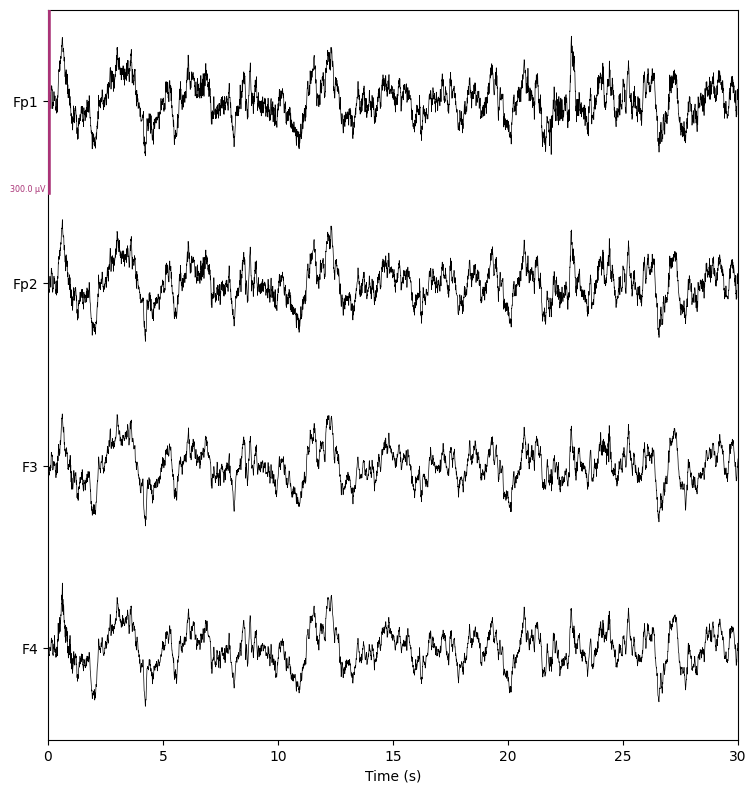

Frontotemporal Dementia


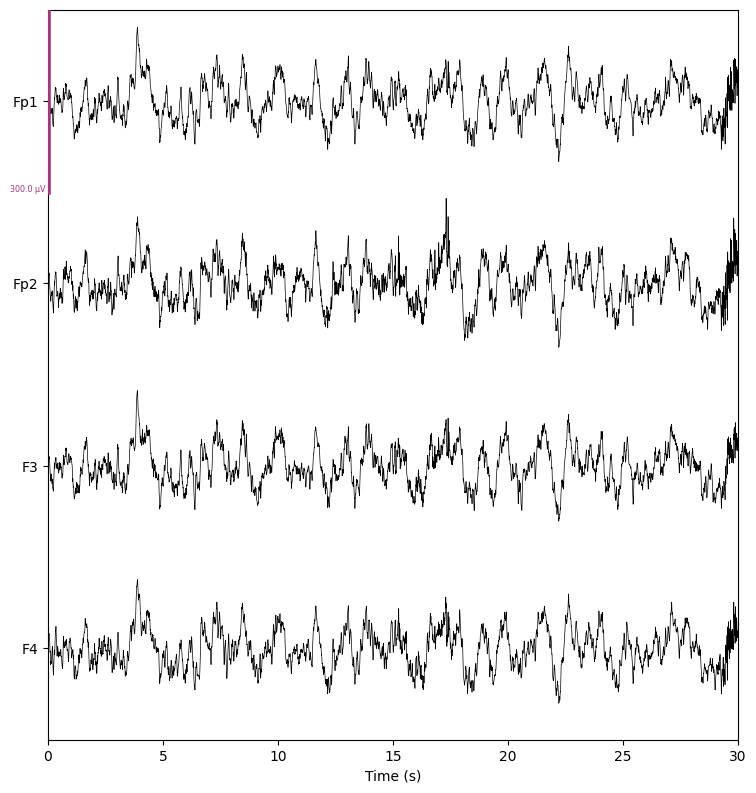

Healthy Control


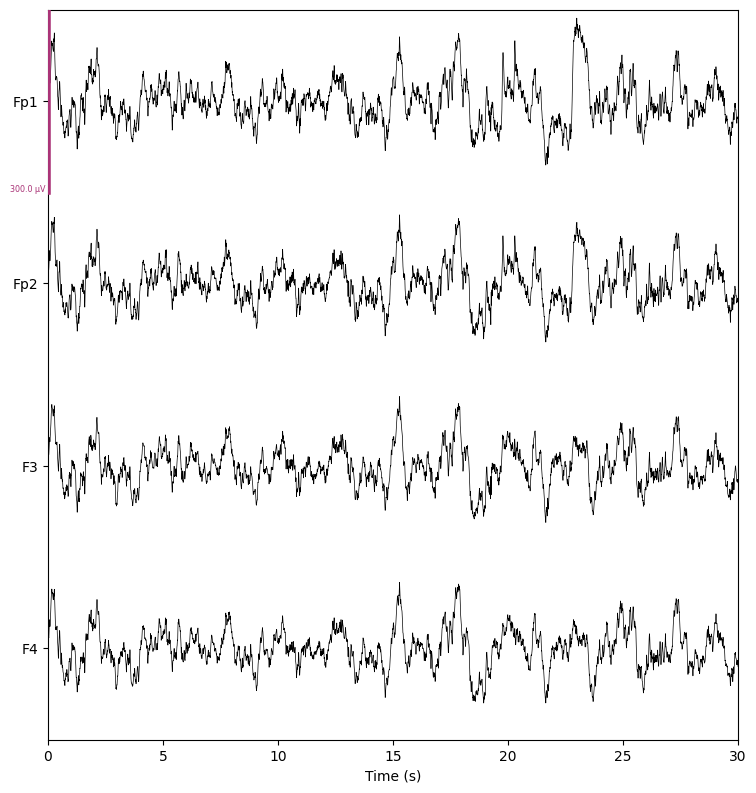

In [8]:
print("Alzheimer")
fig1 = rawA.plot(
    show_scrollbars=False, show_scalebars=True, scalings=dict(eeg=1.5e-4), 
    duration=30, n_channels=4,
    verbose="CRITICAL"
)

print("Frontotemporal Dementia")
fig2 = rawF.plot(
    show_scrollbars=False, show_scalebars=True, scalings=dict(eeg=1.5e-4), 
    duration=30, n_channels=4,
    verbose="CRITICAL"
)

print("Healthy Control")
fig3 = rawC.plot(
    show_scrollbars=False, show_scalebars=True, scalings=dict(eeg=1.5e-4), 
    duration=30, n_channels=4,
    verbose="CRITICAL"
)

plt.show()

Only FP1 Channel

Alzheimer


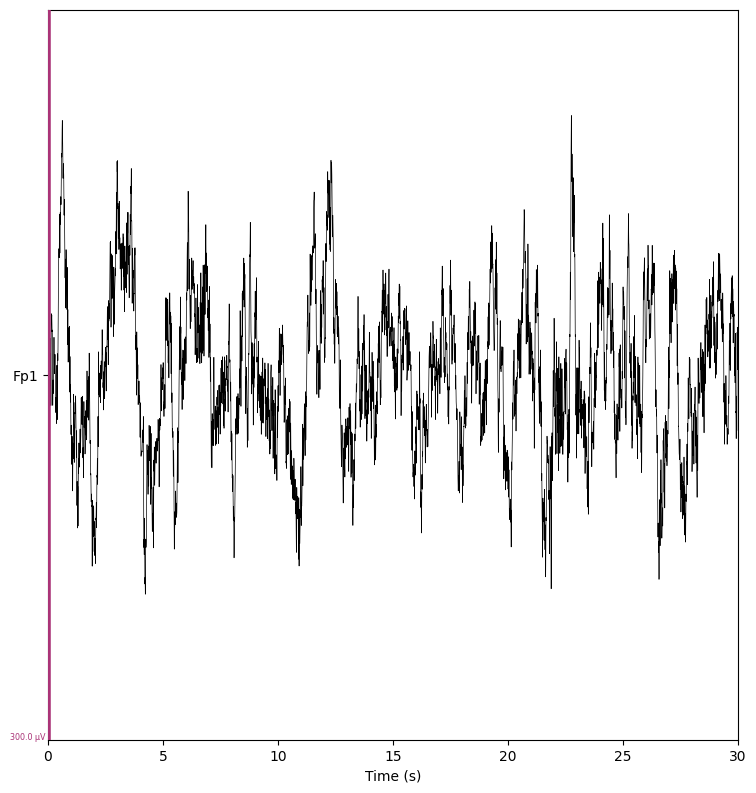

Frontotemporal Dementia


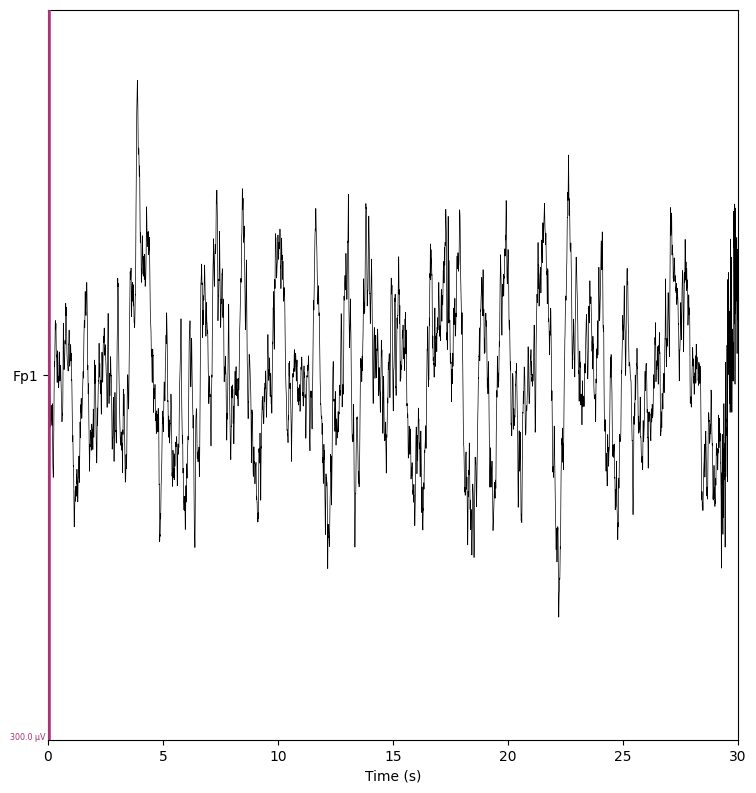

Healthy Control


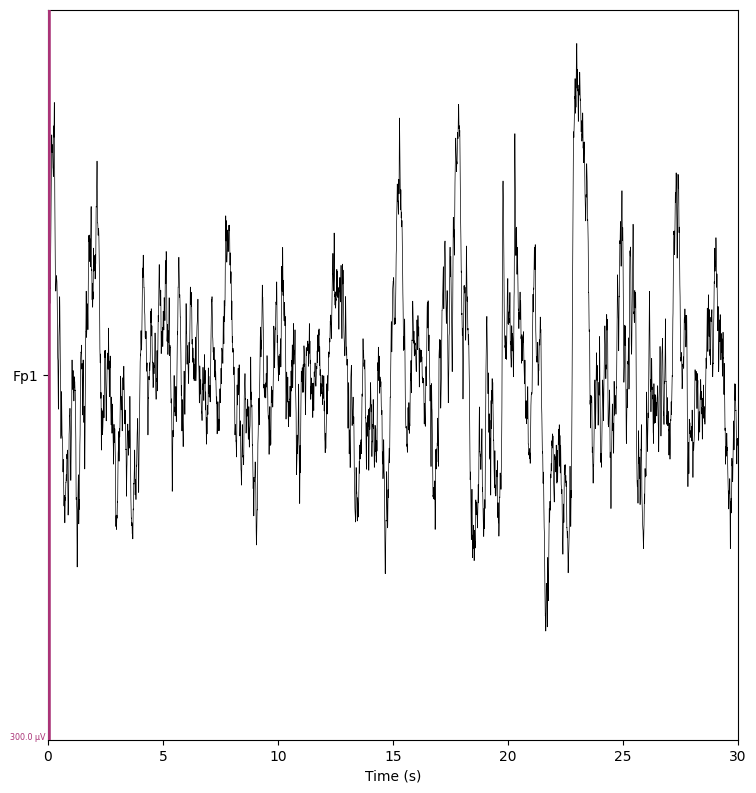

In [9]:
print("Alzheimer")
fig1 = rawA.copy().pick(['Fp1']).plot(
    show_scrollbars=False, show_scalebars=True, scalings=dict(eeg=1.5e-4), 
    duration=30, n_channels=5, verbose="CRITICAL"
)

print("Frontotemporal Dementia")
fig2 = rawF.copy().pick(['Fp1']).plot(
    show_scrollbars=False, show_scalebars=True, scalings=dict(eeg=1.5e-4), 
    duration=30, n_channels=5, verbose="CRITICAL"
)

print("Healthy Control")
fig3 = rawC.copy().pick(['Fp1']).plot(
    show_scrollbars=False, show_scalebars=True, scalings=dict(eeg=1.5e-4), 
    duration=30, n_channels=5, verbose="CRITICAL"
)

plt.show()

## Creating Windows (Epochs) from EEG Data

Creating Epochs (Windows) from EEG Raw Data

Alzheimer

In [10]:
epochs_rawA = eeg_mne.Epochs_Object(rawA, end_time=599)
epochs_rawA

Number of events,14
Events,1: 14
Time range,0.000 – 59.998 s
Baseline,off


Not setting metadata
14 matching events found
No baseline correction applied
0 projection items activated


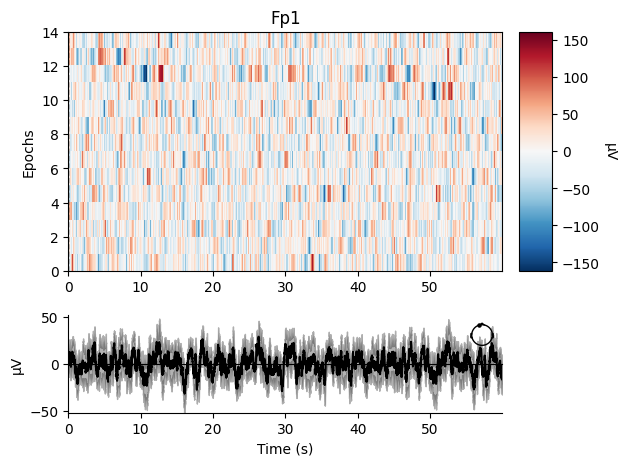

In [11]:
fig = epochs_rawA.plot_image(picks=['Fp1'])
plt.show()

FrontoTemporal

In [12]:
epochs_rawF = eeg_mne.Epochs_Object(rawF, end_time=549)
epochs_rawF

Number of events,13
Events,1: 13
Time range,0.000 – 59.998 s
Baseline,off


Not setting metadata
13 matching events found
No baseline correction applied
0 projection items activated


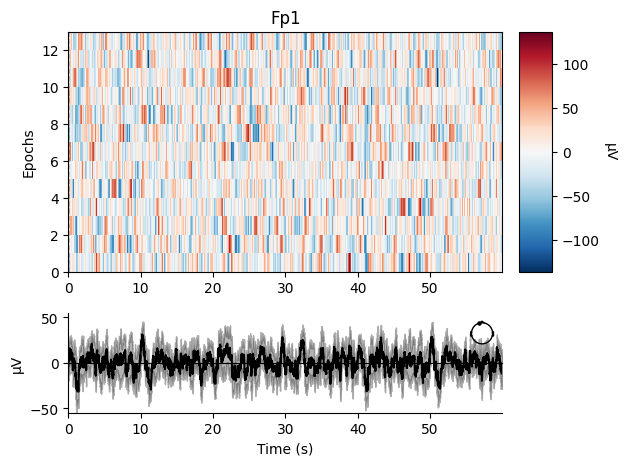

In [13]:
fig = epochs_rawF.plot_image(picks=['Fp1'])
plt.show()

Healthy Control

In [14]:
epochs_rawC = eeg_mne.Epochs_Object(rawC, end_time=600)
epochs_rawC

Number of events,14
Events,1: 14
Time range,0.000 – 59.998 s
Baseline,off


Not setting metadata
14 matching events found
No baseline correction applied
0 projection items activated


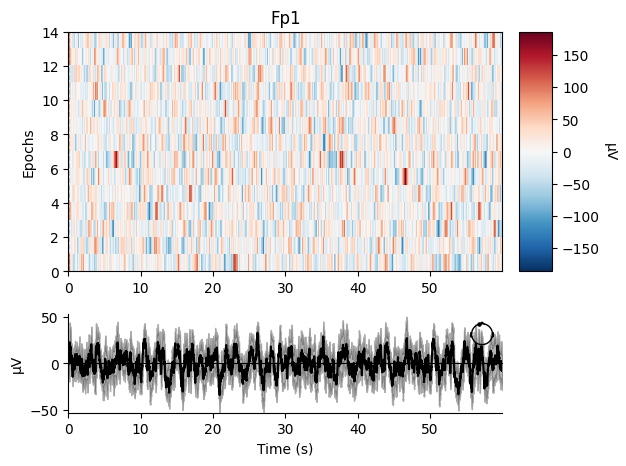

In [15]:
fig = epochs_rawC.plot_image(picks=['Fp1'])
plt.show()